In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## My implementation of linear regression

In [32]:
class LinearRegression():
    def __init__(self, visualization=False):
        self.visualization = visualization
        self.mean = None
        self.std = None
        
        if visualization:
            self.fig = plt.figure()
            self.ax_cost = self.fig.add_subplot(1, 1, 1)
    
    def plot_cost(self):
        self.ax_cost.set_title("Cost")
        self.ax_cost.plot(self.cost_history_[:, np.newaxis])
    
    def hypothesis(self, X, theta):
        return X @ theta

    def cost_function(self, X, y, theta, l=0):
        m = y.size
        error = self.hypothesis(X, theta) - y
        theta_copy = theta.copy()
        regularization = l * theta_copy.T @ theta_copy
        return np.sum(np.power(error, 2) + regularization) / (2 * m) 

    def fit(self, X, y, alpha=0.1, lambda_parametr=0, num_steps=1500):
        num_examples = y.size
        
        #todo: rewrite this
        coef = np.random.rand(X.shape[1])[:, np.newaxis] * 20 - 10
        
        cost_history = [self.cost_function(X, y, coef, lambda_parametr)]
        
        for i in range(num_steps):
            prediction = self.hypothesis(X, coef)
            error = prediction - y
            coef_copy = coef.copy()
            coef_copy[1, :] = 0
            coef = coef * (1 - alpha * lambda_parametr / num_examples) - alpha * (X.T @ error) /  num_examples 
            
            cost_history.append(self.cost_function(X, y, coef, lambda_parametr))
            if cost_history[-1] > cost_history[-2]:
                alpha *= 0.1
        
        self.cost_history_ = np.array(cost_history)
        self.coef_ = coef
        if self.visualization:
            self.plot_cost()
            
    def predict(self, X):
        return self.hypothesis(X, self.coef_)

## Additional pre-processing

In [33]:
def normalize(X):
    X_norm = X.copy()
    X_norm /= X.max(axis=0)
    return X_norm

def polinomial_features(X, p=1):
    return np.power(X, np.arange(p+1))

## Example of using

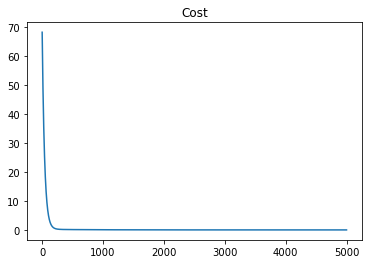

In [19]:
n_examples = 50
degree = 1
X = np.linspace(0, 20, n_examples)[:, np.newaxis]
y = np.sin(X) - X/2 + np.random.rand(n_examples, 1)*5
X = polinomial_features(X, degree)
X = normalize(X)
y = normalize(y)
reg = LinearRegression(visualization=True)
reg.fit(X, y, alpha=1e-2, num_steps=5000)

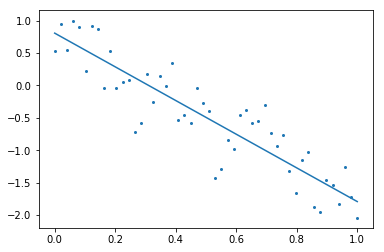

In [20]:
plt.scatter(X[:, 1], y, s=4)
plt.plot(X[:, 1], reg.predict(X))

# Робота алгортиму на реальних даних

In [21]:
# import from csv
df = pd.read_csv(r"..\data\vgsales.csv")

# droping unuseless features
df = df.drop("Rank", axis=1)
df = df.drop("NA_Sales", axis=1)
df = df.drop("EU_Sales", axis=1)
df = df.drop("JP_Sales", axis=1)
df = df.drop("Other_Sales", axis=1)
df = df.drop("Name", axis=1)
df.head()

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.74
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
4,GB,1996.0,Role-Playing,Nintendo,31.37


In [22]:
# Converting categorial variable to numerical
df = pd.get_dummies(df)
df = df.sample(frac=1).reset_index(drop=True)
df = df.dropna()
df.head()

,Year,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,2006.0,0.12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1996.0,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,0.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013.0,0.08,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,0.31,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = df["Global_Sales"].values[:, np.newaxis]
X = df.drop("Global_Sales", axis=1).values

In [24]:
d = np.max(X, axis=0)
d[d == 0] = 1
X /= d
X = np.append(np.ones([X.shape[0], 1]), X, axis=1)
X_train, X_test = X[:int(X.shape[0] * 0.8), :], X[int(X.shape[0] * 0.8):, :]
y_train, y_test = y[:int(X.shape[0] * 0.8), :], y[int(X.shape[0] * 0.8):, :]

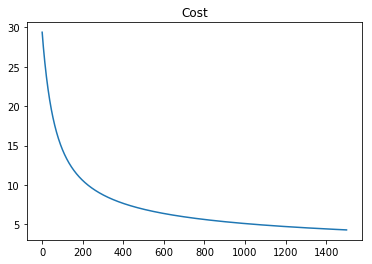

In [25]:
reg = LinearRegression(visualization=True)
reg.fit(X_train, y_train)

In [27]:
reg.cost_function(X_test, y_test, reg.coef_, 0)

4.3484498827957525

## Comparing with sklearn

In [42]:
from sklearn.linear_model import LinearRegression as LinearRegression2
linreg = LinearRegression2()
linreg.fit(X_train, y_train)
reg.cost_function(X_test, y_test, linreg.coef_.T, 0)

3.0348402115123961e+23